In [139]:
!pip install scikit-learn

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
output_path = './期末參數資料(綜合_去極端_流量).csv'
df = pd.read_csv(output_path)

data = df[['形式','入水口角度','出水口角度','旋轉角度','葉厚','片數','間隙(葉輪與幫浦腳)','Q(全開流量)']].values
value = df[['揚程','W(瓦數)']].values  

data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
value_mean = np.mean(value, axis=0)
value_std = np.std(value, axis=0)

data = (data - data_mean) / data_std
value = (value - value_mean) / value_std

data_train, data_test, value_train, value_test = train_test_split(data, value, test_size=0.2, random_state=42)

In [142]:
data_std

array([ 0.48503839,  1.87178445,  1.68116692, 15.66611807,  0.29129582,
        1.31674382,  0.02286245, 43.95008247])

In [143]:
df.head()

,形式,入水口角度,出水口角度,旋轉角度,葉厚,片數,間隙(葉輪與幫浦腳),Q(全開流量),揚程,W(瓦數)
0,1,34.0,13.0,64,2.5,6,0.3,25.0,9.6,164.0
1,1,34.0,13.0,64,2.5,6,0.3,50.0,8.1,199.0
2,1,34.0,13.0,64,2.5,6,0.3,75.0,5.2,235.0
3,1,34.0,13.0,64,2.5,6,0.3,100.0,1.0,273.0
4,1,34.0,13.0,63,2.5,6,0.3,25.0,9.3,165.0


In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# model = Sequential([
#     Dense(1, input_shape=(1,), activation='linear')
# ])

model = Sequential([
    Dense(2, input_shape=(8,), activation='relu'),
    Dense(4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(2, )
])

# create a model
model.compile(optimizer=Adam(learning_rate=0.0075), loss='mse', metrics='accuracy')

In [145]:
history = model.fit(data_train, value_train, validation_split = 0.2, epochs=200, batch_size=2)

Epoch 1/200
155/155 [==============================] - 1s 4ms/step - loss: 0.9178 - accuracy: 0.5484 - val_loss: 0.6428 - val_accuracy: 0.6154
Epoch 2/200
155/155 [==============================] - 0s 2ms/step - loss: 0.8085 - accuracy: 0.5484 - val_loss: 0.6747 - val_accuracy: 0.6154
Epoch 3/200
155/155 [==============================] - 0s 2ms/step - loss: 0.7736 - accuracy: 0.4839 - val_loss: 0.5708 - val_accuracy: 0.6154
Epoch 4/200
155/155 [==============================] - 0s 2ms/step - loss: 0.7204 - accuracy: 0.5387 - val_loss: 0.6148 - val_accuracy: 0.4231
Epoch 5/200
155/155 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5161 - val_loss: 0.5446 - val_accuracy: 0.5769
Epoch 6/200
155/155 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5323 - val_loss: 0.5399 - val_accuracy: 0.6282
Epoch 7/200
155/155 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.5387 - val_loss: 0.5302 - val_accuracy: 0.6538

4/4 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9694


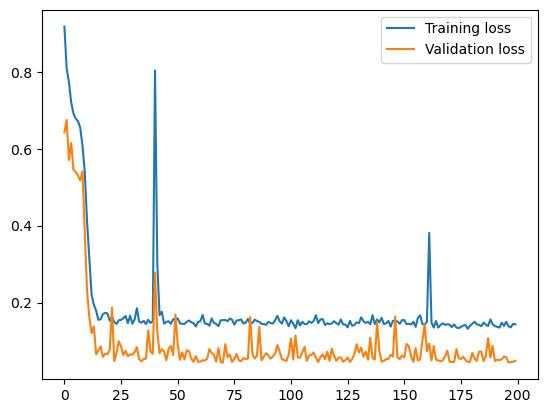

In [146]:
# evaluate model
model.evaluate(data_test, value_test)

# drawing training history
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [147]:
from sklearn.metrics.pairwise import cosine_similarity    
           
def r_of_R():
    Pearson = cosine_similarity([model.predict(data_train)[:,0], value_train[:,0]])
    print(Pearson[0,1])

def r_of_W():
    Pearson = cosine_similarity([model.predict(data_train)[:,1], value_train[:,1]])
    print(Pearson[0,1])

r_of_R()
r_of_W()


13/13 [==============================] - 0s 1ms/step
0.9693944882774163
13/13 [==============================] - 0s 1ms/step
0.9101406020014143


In [128]:
data_train[0:5]

array([[-0.78055847, -0.99506727, -0.81880222,  0.51669789,  0.69223818,
         0.51255006,  0.57869787, -1.2240692 ],
       [-0.78055847,  0.07343183, -0.22397729,  0.77202598, -1.02422996,
         0.51255006,  0.57869787, -0.65524206],
       [-0.78055847, -0.46081772, -0.22397729,  0.51669789,  0.69223818,
         0.51255006, -1.60829407, -1.2240692 ],
       [ 1.28113401,  0.07343183,  0.96567258, -0.56844649,  0.69223818,
        -2.52524662,  0.57869787,  0.26853323],
       [-0.78055847,  0.60768138,  1.56049751,  0.64436194, -1.02422996,
         0.51255006, -1.60829407, -1.2240692 ]])

In [119]:
np.set_printoptions(suppress=True)
value_train 

array([[ 0.49766946, -0.95529994],
       [ 0.02537477, -0.62370037],
       [ 0.49766946, -0.95529994],
       [ 0.41895368, -0.33488784],
       [ 0.55014664, -0.88042261],
       [ 0.52390805, -0.97669346],
       [-0.57811288, -0.12095263],
       [ 1.9670307 ,  1.83655452],
       [ 1.10115711,  1.31134359],
       [ 1.02244133,  1.26427784],
       [ 0.47143086, -0.97669346],
       [-0.65682866, -0.18513319],
       [ 1.78336054,  1.80446424],
       [-0.68306726, -0.20652671],
       [-1.70637241,  0.23204047],
       [ 1.07491852,  0.53154976],
       [-0.65682866, -0.18513319],
       [-0.36820413, -1.0729643 ],
       [-0.68306726, -0.17443643],
       [-1.732611  ,  0.25343399],
       [ 0.13032915, -0.4525522 ],
       [-1.62765663,  0.32831131],
       [ 0.89124836,  0.56364004],
       [ 1.38978164,  0.92732989],
       [ 1.67840617,  1.41938087],
       [ 0.07785196, -0.60230684],
       [ 0.57638524, -0.75206149],
       [-0.1058182 , -0.47394572],
       [ 0.41895368,

In [120]:
model.predict(data_train) #[predict_distance,predict_height]

13/13 [==============================] - 0s 1ms/step


array([[ 0.49885035, -0.9226563 ],
       [ 0.13659745, -0.5198628 ],
       [ 0.5007464 , -0.92195064],
       [ 0.16212109, -0.25508738],
       [ 0.49092847, -0.9256044 ],
       [ 0.48740584, -0.9269153 ],
       [-0.602793  , -0.08421385],
       [ 1.7164397 ,  1.522272  ],
       [ 1.2584949 ,  1.832259  ],
       [ 1.3187048 ,  1.9740239 ],
       [ 0.4970414 , -0.9233295 ],
       [-0.6008431 , -0.08435857],
       [ 1.8248751 ,  2.1659188 ],
       [-0.6125994 , -0.08348668],
       [-1.676147  ,  0.38387847],
       [ 0.8352564 ,  0.51464105],
       [-0.6008431 , -0.08435857],
       [-0.26375037, -1.065512  ],
       [-0.56467456, -0.08704078],
       [-1.676147  ,  0.38387847],
       [ 0.14842257, -0.5402896 ],
       [-1.676147  ,  0.38387847],
       [ 1.1715269 ,  0.8991655 ],
       [ 1.1228735 ,  0.8435303 ],
       [ 1.5864937 ,  1.3736788 ],
       [ 0.13620207, -0.51917994],
       [ 0.5120294 , -0.91775167],
       [-0.10568054, -0.41585398],
       [ 0.16212109,

In [149]:
#showing the predicting consequence

type_input = float(input("type('1' for centrifugal, '2' for hybrid)："))
inlet_angle_input = float(input("inlet_angle（degree）："))
outlet_angle_input = float(input("outlet_angle（degree）："))
rotating_angle_input = float(input("rotating_angle（degree）："))
thickness_input = float(input("thickness (mm)："))
slices_input = float(input("slices："))
gap_input = float(input("gap (mm)："))
flow_input = float(input("flow (L/min)："))

type_input = (type_input - data_mean[0])/data_std[0]
inlet_angle_input = (inlet_angle_input - data_mean[1])/data_std[1]
outlet_angle_input = (outlet_angle_input - data_mean[2])/data_std[2]
rotating_angle_input =(rotating_angle_input - data_mean[3])/data_std[3]
thickness_input = (thickness_input - data_mean[4])/data_std[4]
slices_input = (slices_input - data_mean[5])/data_std[5]
gap_input = (gap_input - data_mean[6])/data_std[6]
flow_input = (flow_input - data_mean[7])/data_std[7]

predicted_values = model.predict(np.array([[type_input,inlet_angle_input,outlet_angle_input,rotating_angle_input,thickness_input,slices_input,gap_input,flow_input]]))[0]
predict_range = predicted_values[0] 
predict_power = predicted_values[1] 

predict_range = predict_range * value_std[0] + value_mean[0]
predict_power = predict_power * value_std[1] + value_mean[1]


print('(1)predict_range(m): ', predict_range)
print('(2)predict_power(w): ', predict_power)

type('1' for centrifugal, '2' for hybrid)： 0.94
inlet_angle（degree）： 35
outlet_angle（degree）： 14.4
rotating_angle（degree）： 62
thickness (mm)： 2.76
slices： 5.89
gap (mm)： 0.28
flow (L/min)： 22.27


1/1 [==============================] - 0s 21ms/step
(1)predict_range(m):  9.69029576155251
(2)predict_power(w):  192.7694013190341


In [148]:
model.save('ANN_DCBL.h5')